# Project - Crime Rate In Chicago

# Project Description:

- The Chicago Crime dataset contains a summary of the reported crimes occurred in the City of Chicago from 2005 to 2017. 
- Dataset has been obtained from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system.


# Problem Statement:

1. Show the top 15 types of crime
2. Show the top 15 locations of crime
3. Show crimes on Yearly, Monthly and Quartely bases
4. Predict monthly crime rates for next 1 year and 2 years if the same trend of crime continous? 

# Dataset Details:

- Dataset Characteristics - Timeseries
- Number of Attributes : 23

# Attribue Information:

- Dataset contains the following columns: 
    - ID: Unique identifier for the record.
    - Case Number: The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.
    - Date: Date when the incident occurred.
    - Block: address where the incident occurred
    - IUCR: The Illinois Unifrom Crime Reporting code.
    - Primary Type: The primary description of the IUCR code.
    - Description: The secondary description of the IUCR code, a subcategory of the primary description.
    - Location Description: Description of the location where the incident occurred.
    - Arrest: Indicates whether an arrest was made.
    - Domestic: Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.
    - Beat: Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. 
    - District: Indicates the police district where the incident occurred. 
    - Ward: The ward (City Council district) where the incident occurred. 
    - Community Area: Indicates the community area where the incident occurred. Chicago has 77 community areas. 
    - FBI Code: Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). 
    - X Coordinate: The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. 
    - Y Coordinate: The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. 
    - Year: Year the incident occurred.
    - Updated On: Date and time the record was last updated.
    - Latitude: The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
    - Longitude: The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
    - Location: The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.
- Datasource: https://www.kaggle.com/currie32/crimes-in-chicago

# 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# fbprophet is a package by facebook for time series data.
from fbprophet import Prophet

# 2. Import Data

In [3]:
df1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False , usecols = [ 'Date', 'Primary Type', 'Location Description'])
df2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False, usecols = [ 'Date', 'Primary Type', 'Location Description'])
df3 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False, usecols = [ 'Date', 'Primary Type', 'Location Description'])
# error_bad_line => Lines with too many fields (e.g. a csv line with too many commas) will by
#         default cause an exception to be raised, and no DataFrame will be returned.
#         If False, then these "bad lines" will dropped from the DataFrame that is
#         returned.

print(df1.shape)
print(df2.shape)
print(df3.shape)

(1872344, 3)
(2688711, 3)
(1456714, 3)


In [4]:
# ignore_index = True -> do not take index from dataframes, creates own index
crime_df = pd.concat([df1,df2,df3], ignore_index= True)
crime_df.shape

(6017769, 3)

# 3. Exploring The Data

In [5]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6017769 entries, 0 to 6017768
Data columns (total 3 columns):
Date                    object
Primary Type            object
Location Description    object
dtypes: object(3)
memory usage: 137.7+ MB


In [6]:
crime_df.head()

,Date,Primary Type,Location Description
0,04/02/2006 01:00:00 PM,OTHER OFFENSE,RESIDENCE
1,02/26/2006 01:40:48 PM,NARCOTICS,SIDEWALK
2,01/08/2006 11:16:00 PM,ASSAULT,OTHER
3,04/05/2006 06:45:00 PM,BATTERY,RESIDENCE
4,02/17/2006 09:03:14 PM,NARCOTICS,ALLEY


#### To Know how many missing values are in the data column wise

In [7]:
miss_val_df = pd.DataFrame(crime_df.isnull().sum())
miss_val_df['Missing Percentage'] = (miss_val_df[0]/len(crime_df))*100
miss_val_df = miss_val_df.rename(columns={0:'Missing Values'})
miss_val_df

,Missing Values,Missing Percentage
Date,0,0.000000
Primary Type,0,0.000000
Location Description,1974,0.032803


#### Date is not in Datetime data type so convert it first

In [8]:
crime_df['Date'] = pd.to_datetime(crime_df['Date'],format="%m/%d/%Y %I:%M:%S %p")
# crime_df.Date = pd.to_datetime(df.Date,format="%m/%d/%Y %I:%M:%S %p")
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6017769 entries, 0 to 6017768
Data columns (total 3 columns):
Date                    datetime64[ns]
Primary Type            object
Location Description    object
dtypes: datetime64[ns](1), object(2)
memory usage: 137.7+ MB


#### Use Date Column as an Index for analysis based on Date

In [9]:
crime_df.index = pd.DatetimeIndex(crime_df['Date'])
crime_df.head()

,Date,Primary Type,Location Description
Date,,,
2006-04-02 13:00:00,2006-04-02 13:00:00,OTHER OFFENSE,RESIDENCE
2006-02-26 13:40:48,2006-02-26 13:40:48,NARCOTICS,SIDEWALK
2006-01-08 23:16:00,2006-01-08 23:16:00,ASSAULT,OTHER
2006-04-05 18:45:00,2006-04-05 18:45:00,BATTERY,RESIDENCE
2006-02-17 21:03:14,2006-02-17 21:03:14,NARCOTICS,ALLEY


### Visualize Top 15 Primary Types of Crime

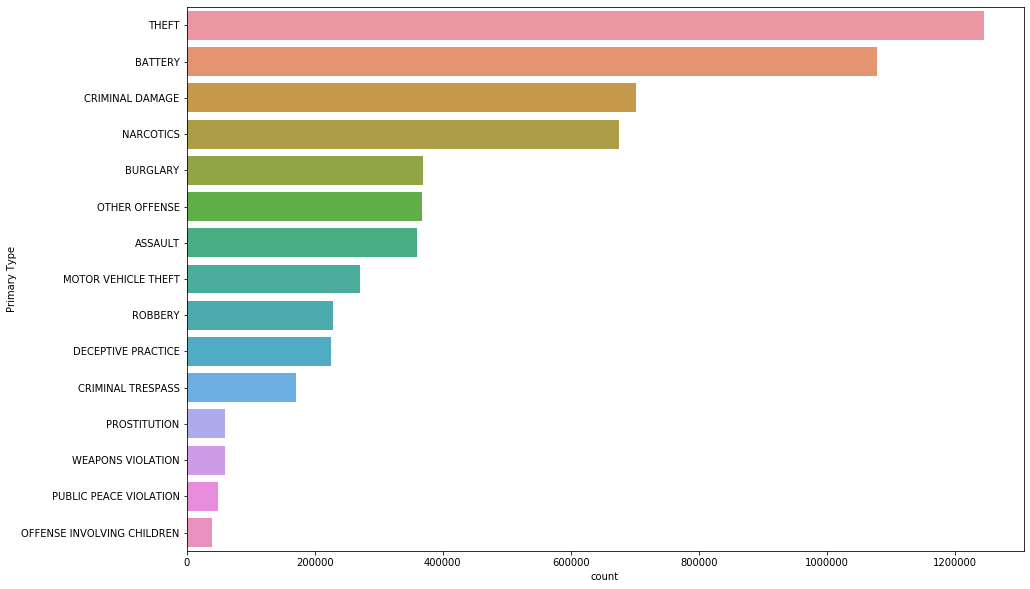

In [10]:
columns = crime_df['Primary Type'].value_counts().iloc[:15].index
plt.figure(figsize=(15,10))
sns.countplot(y='Primary Type', data=crime_df, order=columns)
plt.show()

### Visualize Top 15 Locations where crimes occured

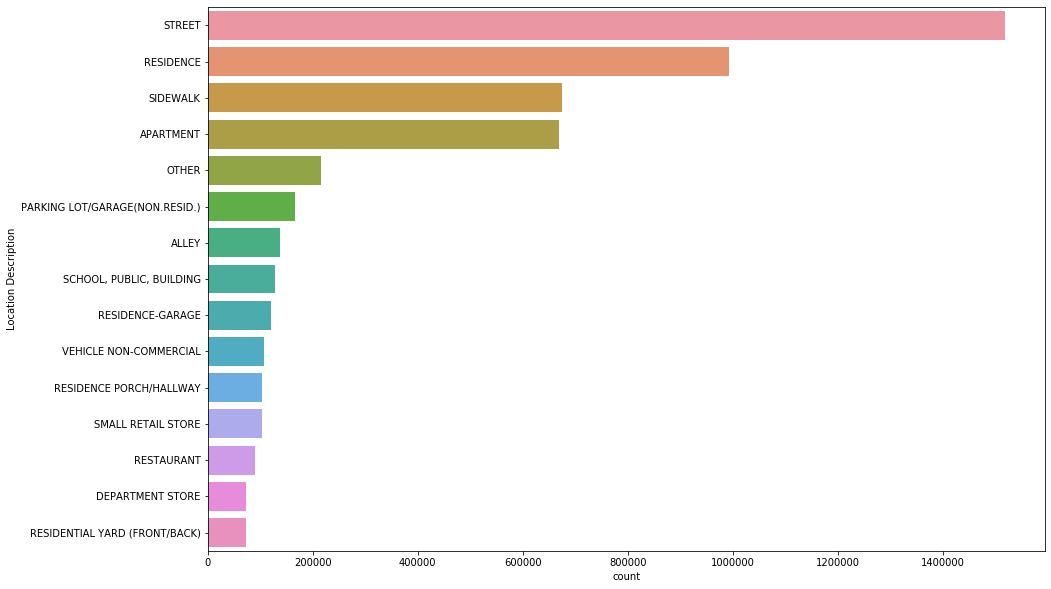

In [11]:
plt.figure(figsize=(15,10))
sns.countplot(y='Location Description', data=crime_df, order=crime_df['Location Description'].value_counts().iloc[:15].index)
plt.show()

### Crimes per year

In [12]:
crimes_per_year = crime_df.resample('Y').size()
crimes_per_year

Date
2005-12-31    455811
2006-12-31    794684
2007-12-31    621849
2008-12-31    852053
2009-12-31    783900
2010-12-31    700692
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

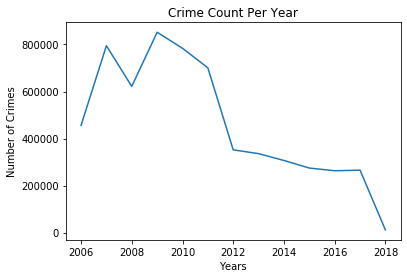

In [13]:
plt.plot(crimes_per_year)
plt.title("Crime Count Per Year")
plt.xlabel("Years")
plt.ylabel("Number of Crimes")
plt.show()

### Crimes per Month

In [14]:
crimes_per_month = crime_df.resample('M').size()
crimes_per_month

Date
2005-01-31    33983
2005-02-28    32042
2005-03-31    36970
2005-04-30    38963
2005-05-31    40572
              ...  
2016-09-30    23235
2016-10-31    23314
2016-11-30    21140
2016-12-31    19580
2017-01-31    11357
Freq: M, Length: 145, dtype: int64

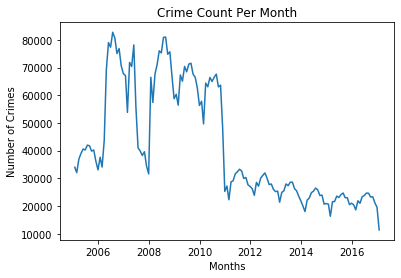

In [15]:
plt.plot(crimes_per_month)
plt.title("Crime Count Per Month")
plt.xlabel("Months")
plt.ylabel("Number of Crimes")
plt.show()

### Crimes per Quarter

In [16]:
crimes_per_quarter = crime_df.resample('Q').size()
crimes_per_quarter.head()

Date
2005-03-31    102995
2005-06-30    119769
2005-09-30    123550
2005-12-31    109497
2006-03-31    115389
Freq: Q-DEC, dtype: int64

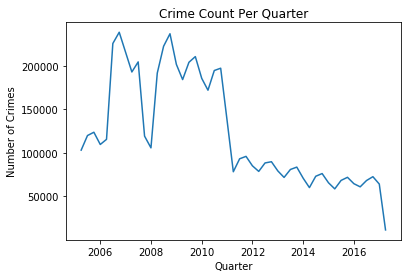

In [17]:
plt.plot(crimes_per_quarter)
plt.title("Crime Count Per Quarter")
plt.xlabel("Quarter")
plt.ylabel("Number of Crimes")
plt.show()

# 4. Data Preprocessing

#### Make new dataframe with Date and it's count Monthly bases to feed the data to fbprophet

In [18]:
df_prophet = crime_df.resample('M').size().reset_index()
df_prophet

,Date,0
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


#### Change Column names as the fbprophet takes

In [19]:
# df_prophet.columns = ['Date',"y"]
df_prophet_final = df_prophet.rename(columns={'Date':'ds',0:'y'})
df_prophet_final

,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


# 5. Make Prediction

### Predict for Next 1 year

In [20]:
model = Prophet()
model.fit(df_prophet_final)
future = model.make_future_dataframe(365) # provide days #to create months for next year
forecast = model.predict(future) # to predict the crimes for new created months of next year
forecast

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60452.827677,37871.631974,71115.169303,60452.827677,60452.827677,-4771.920483,-4771.920483,-4771.920483,-4771.920483,-4771.920483,-4771.920483,0.0,0.0,0.0,55680.907194
1,2005-02-28,60320.418736,33962.571150,67619.900746,60320.418736,60320.418736,-9504.529006,-9504.529006,-9504.529006,-9504.529006,-9504.529006,-9504.529006,0.0,0.0,0.0,50815.889731
2,2005-03-31,60173.823124,41390.704365,75151.156059,60173.823124,60173.823124,-1228.739958,-1228.739958,-1228.739958,-1228.739958,-1228.739958,-1228.739958,0.0,0.0,0.0,58945.083166
3,2005-04-30,60031.956403,45258.134759,78031.837433,60031.956403,60031.956403,1185.697773,1185.697773,1185.697773,1185.697773,1185.697773,1185.697773,0.0,0.0,0.0,61217.654175
4,2005-05-31,59885.360790,48903.037083,83212.231001,59885.360790,59885.360790,5503.425534,5503.425534,5503.425534,5503.425534,5503.425534,5503.425534,0.0,0.0,0.0,65388.786324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,2018-01-27,10127.749182,-12232.742649,22830.315845,9977.650336,10274.159111,-4996.791370,-4996.791370,-4996.791370,-4996.791370,-4996.791370,-4996.791370,0.0,0.0,0.0,5130.957812
506,2018-01-28,10114.691532,-12198.757173,22700.648936,9963.486947,10261.633202,-4939.386327,-4939.386327,-4939.386327,-4939.386327,-4939.386327,-4939.386327,0.0,0.0,0.0,5175.305205
507,2018-01-29,10101.633883,-11471.249646,22979.126546,9949.332685,10249.842944,-4882.539407,-4882.539407,-4882.539407,-4882.539407,-4882.539407,-4882.539407,0.0,0.0,0.0,5219.094476
508,2018-01-30,10088.576233,-12392.472874,22030.248654,9935.153149,10238.052685,-4829.114762,-4829.114762,-4829.114762,-4829.114762,-4829.114762,-4829.114762,0.0,0.0,0.0,5259.461471


#### Visualize the trend

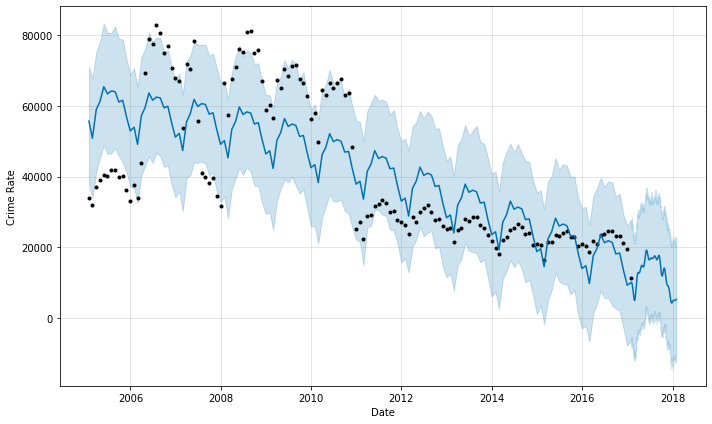

In [21]:
figure = model.plot(forecast, xlabel='Date', ylabel='Crime Rate')

Here we can see the trend is decreasing

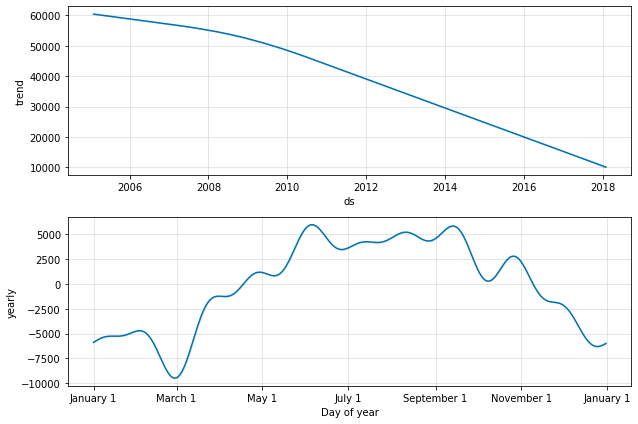

In [22]:
figure = model.plot_components(forecast)

### Predict for next 2 years

In [23]:
model = Prophet()
model.fit(df_prophet_final)
future = model.make_future_dataframe(periods=710)
forecast = model.predict(future)
forecast

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60452.827677,39913.377194,71844.043214,60452.827677,60452.827677,-4771.920483,-4771.920483,-4771.920483,-4771.920483,-4771.920483,-4771.920483,0.0,0.0,0.0,55680.907194
1,2005-02-28,60320.418736,34743.938804,67355.372228,60320.418736,60320.418736,-9504.529006,-9504.529006,-9504.529006,-9504.529006,-9504.529006,-9504.529006,0.0,0.0,0.0,50815.889731
2,2005-03-31,60173.823124,41742.035810,75779.338979,60173.823124,60173.823124,-1228.739958,-1228.739958,-1228.739958,-1228.739958,-1228.739958,-1228.739958,0.0,0.0,0.0,58945.083166
3,2005-04-30,60031.956403,44291.781276,77079.024041,60031.956403,60031.956403,1185.697773,1185.697773,1185.697773,1185.697773,1185.697773,1185.697773,0.0,0.0,0.0,61217.654175
4,2005-05-31,59885.360790,49109.964507,81966.190459,59885.360790,59885.360790,5503.425534,5503.425534,5503.425534,5503.425534,5503.425534,5503.425534,0.0,0.0,0.0,65388.786324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,2019-01-07,5622.860030,-16196.492046,18050.579290,5205.229812,6006.946506,-5454.981269,-5454.981269,-5454.981269,-5454.981269,-5454.981269,-5454.981269,0.0,0.0,0.0,167.878762
851,2019-01-08,5609.802381,-15850.345221,18705.408353,5191.758115,5995.321207,-5400.314548,-5400.314548,-5400.314548,-5400.314548,-5400.314548,-5400.314548,0.0,0.0,0.0,209.487833
852,2019-01-09,5596.744731,-17572.406284,17480.037558,5178.309338,5983.646776,-5355.607510,-5355.607510,-5355.607510,-5355.607510,-5355.607510,-5355.607510,0.0,0.0,0.0,241.137221
853,2019-01-10,5583.687081,-15777.306864,16939.696471,5164.860560,5971.941321,-5320.846687,-5320.846687,-5320.846687,-5320.846687,-5320.846687,-5320.846687,0.0,0.0,0.0,262.840395


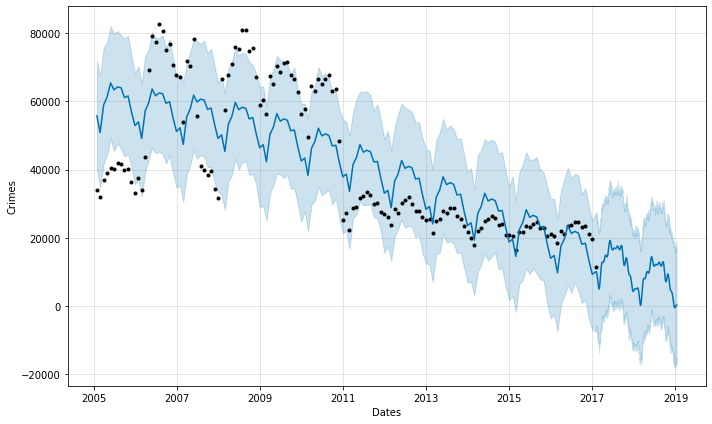

In [24]:
figure = model.plot(forecast, xlabel="Dates", ylabel="Crimes")

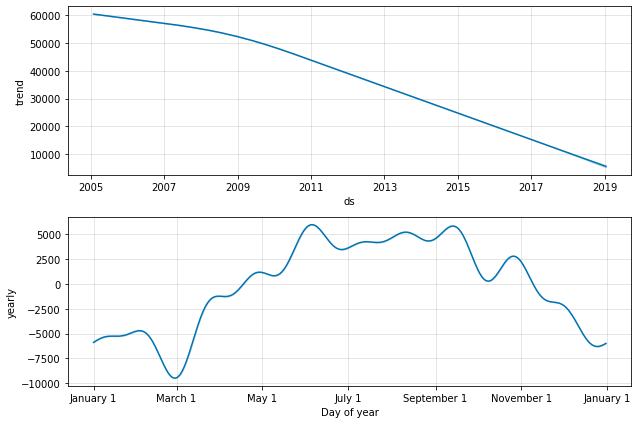

In [25]:
figure = model.plot_components(forecast)